In [1]:
import pandas as pd
import glob
import json
import matplotlib.pyplot as plt
from argparse import ArgumentParser

In [2]:
parser = ArgumentParser()
parser.add_argument(
    "--above-version", default="0", 
    help="include only version folders with number equal or higher than it.")

parsed_args = parser.parse_args()

In [3]:
path_pattern = "../model/MF/mean-field/version_*/val_dict.json"
json_paths = sorted(glob.glob(path_pattern))

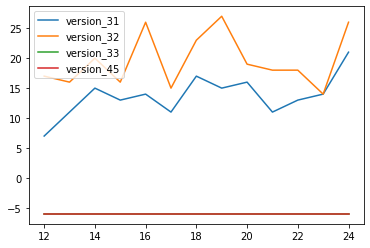

In [4]:
n_epochs_dict = {}

for json_path in json_paths:

    # get version number and name
    version_name = json_path.split("/")[-2]
    version_number = int(version_name.split("_")[-1])
    if version_number < int(parsed_args.above_version):
        continue

    #  get number of epochs
    with open(json_path, 'r') as f:
        val_dict = json.load(f)

    best_epochs = []
    for (i, perf_list) in enumerate(val_dict.values()):
        if i % 2 == 0:
            best_epochs.append(len(perf_list) - 7)
    plt.plot(range(12, 25), best_epochs, label=version_name)
    # plt.title(version_name)

plt.legend()
plt.savefig("../img/n-epoch-val.pdf", bbox_inches="tight")
